In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The experiments was done on volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

There are more than 10000 rows in the data, where each row represents one of the six activities. The activities are listed as 1 through 6 in y column and labeled in the Activity column in the dataset. There are 560+ predictor columns derived from the sensors measuring various metrics or characteristics of a certain activity. 
The main objective is to catch the hidden signal in the feature space (predictors) through machine learning classification algorithms mapping predictors to the activity column. Make sure to reduce dimensions, as 560 are too many, and then try various classification algorithms on the reduced dimensions. 



In [26]:
df = pd.read_csv("/kaggle/input/human-activities-recognitions-data/HumanActivityRecognition.csv", index_col=0)

In [27]:
df.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,26 tBodyAcc-arCoeff()-X_1,27 tBodyAcc-arCoeff()-X_2,28 tBodyAcc-arCoeff()-X_3,29 tBodyAcc-arCoeff()-X_4,30 tBodyAcc-arCoeff()-Y_1,31 tBodyAcc-arCoeff()-Y_2,32 tBodyAcc-arCoeff()-Y_3,33 tBodyAcc-arCoeff()-Y_4,34 tBodyAcc-arCoeff()-Z_1,35 tBodyAcc-arCoeff()-Z_2,36 tBodyAcc-arCoeff()-Z_3,37 tBodyAcc-arCoeff()-Z_4,38 tBodyAcc-correlation()-X_Y,39 tBodyAcc-correlation()-X_Z,40 tBodyAcc-correlation()-Y_Z,41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,66 tGravityAcc-arCoeff()-X_1,67 tGravityAcc-arCoeff()-X_2,68 tGravityAcc-arCoeff()-X_3,69 tGravityAcc-arCoeff()-X_4,70 tGravityAcc-arCoeff()-Y_1,71 tGravityAcc-arCoeff()-Y_2,72 tGravityAcc-arCoeff()-Y_3,73 tGravityAcc-arCoeff()-Y_4,74 tGravityAcc-arCoeff()-Z_1,75 tGravityAcc-arCoeff()-Z_2,76 tGravityAcc-arCoeff()-Z_3,77 tGravityAcc-arCoeff()-Z_4,78 tGravityAcc-correlation()-X_Y,79 tGravityAcc-correlation()-X_Z,80 tGravityAcc-correlation()-Y_Z,81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,106 tBodyAccJerk-arCoeff()-X_1,107 tBodyAccJerk-arCoeff()-X_2,108 tBodyAccJerk-arCoeff()-X_3,109 tBodyAccJerk-arCoeff()-X_4,110 tBodyAccJerk-arCoeff()-Y_1,111 tBodyAccJerk-arCoeff()-Y_2,112 tBodyAccJerk-arCoeff()-Y_3,113 tBodyAccJerk-arCoeff()-Y_4,114 tBodyAccJerk-arCoeff()-Z_1,115 tBodyAccJerk-arCoeff()-Z_2,116 tBodyAccJerk-arCoeff()-Z_3,117 tBodyAccJerk-arCoeff()-Z_4,118 tBodyAccJerk-correlation()-X_Y,119 tBodyAccJerk-correlation()-X_Z,120 tBodyAccJerk-correlation()-Y_Z,121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,146 tBodyGyro-arCoeff()-X_1,147 tBodyGyro-arCoeff()-X_2,148 tBodyGyro-arCoeff()-X_3,149 tBodyGyro-arCoeff()-X_4,150 tBodyGyro-arCoeff()-Y_1,151 tBodyGyro-arCoeff()-Y_2,152 tBodyGyro-arCoeff()-Y_3,153 tBodyGyro-arCoeff()-Y_4,154 tBodyGyro-arCoeff()-Z_1,155 tBodyGyro-arCoeff()-Z_2,156 tBodyGyro-arCoeff()-Z_3,157 tBodyGyro-arCoeff()-Z_4,158 tBodyGyro-correlation()

In [4]:
#data structure
df.shape

(10297, 564)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Columns: 564 entries, Unnamed: 0 to Activity
dtypes: float64(561), int64(2), object(1)
memory usage: 44.3+ MB


In [13]:


pd.set_option('display.max_columns', None)


In [42]:
list(df.columns)

['1 tBodyAcc-mean()-X',
 '2 tBodyAcc-mean()-Y',
 '3 tBodyAcc-mean()-Z',
 '4 tBodyAcc-std()-X',
 '5 tBodyAcc-std()-Y',
 '6 tBodyAcc-std()-Z',
 '7 tBodyAcc-mad()-X',
 '8 tBodyAcc-mad()-Y',
 '9 tBodyAcc-mad()-Z',
 '10 tBodyAcc-max()-X',
 '11 tBodyAcc-max()-Y',
 '12 tBodyAcc-max()-Z',
 '13 tBodyAcc-min()-X',
 '14 tBodyAcc-min()-Y',
 '15 tBodyAcc-min()-Z',
 '16 tBodyAcc-sma()',
 '17 tBodyAcc-energy()-X',
 '18 tBodyAcc-energy()-Y',
 '19 tBodyAcc-energy()-Z',
 '20 tBodyAcc-iqr()-X',
 '21 tBodyAcc-iqr()-Y',
 '22 tBodyAcc-iqr()-Z',
 '23 tBodyAcc-entropy()-X',
 '24 tBodyAcc-entropy()-Y',
 '25 tBodyAcc-entropy()-Z',
 '26 tBodyAcc-arCoeff()-X_1',
 '27 tBodyAcc-arCoeff()-X_2',
 '28 tBodyAcc-arCoeff()-X_3',
 '29 tBodyAcc-arCoeff()-X_4',
 '30 tBodyAcc-arCoeff()-Y_1',
 '31 tBodyAcc-arCoeff()-Y_2',
 '32 tBodyAcc-arCoeff()-Y_3',
 '33 tBodyAcc-arCoeff()-Y_4',
 '34 tBodyAcc-arCoeff()-Z_1',
 '35 tBodyAcc-arCoeff()-Z_2',
 '36 tBodyAcc-arCoeff()-Z_3',
 '37 tBodyAcc-arCoeff()-Z_4',
 '38 tBodyAcc-correlation()

In [21]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

Unnamed: 0                       0
379 fBodyAccJerk-kurtosis()-Y    0
373 fBodyAccJerk-meanFreq()-X    0
374 fBodyAccJerk-meanFreq()-Y    0
375 fBodyAccJerk-meanFreq()-Z    0
376 fBodyAccJerk-skewness()-X    0
377 fBodyAccJerk-kurtosis()-X    0
378 fBodyAccJerk-skewness()-Y    0
380 fBodyAccJerk-skewness()-Z    0
371 fBodyAccJerk-maxInds-Y       0
dtype: int64


In [9]:
pd.set_option('display.max_columns', 600)

In [23]:
#descriptive statistics
print(df.describe())

         Unnamed: 0  1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
count  10297.000000         10297.000000         10297.000000   
mean    3045.858697             0.274348            -0.017743   
std     2100.692557             0.067635             0.037132   
min        1.000000            -1.000000            -1.000000   
25%     1288.000000             0.263000            -0.024900   
50%     2575.000000             0.277000            -0.017200   
75%     4777.000000             0.288000            -0.010600   
max     7351.000000             1.000000             1.000000   

       3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  \
count         10297.000000        10297.000000        10297.000000   
mean             -0.108932           -0.607710           -0.510106   
std               0.053036            0.438707            0.500249   
min              -1.000000           -1.000000           -1.000000   
25%              -0.121000           -0.992000           -0.9770

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


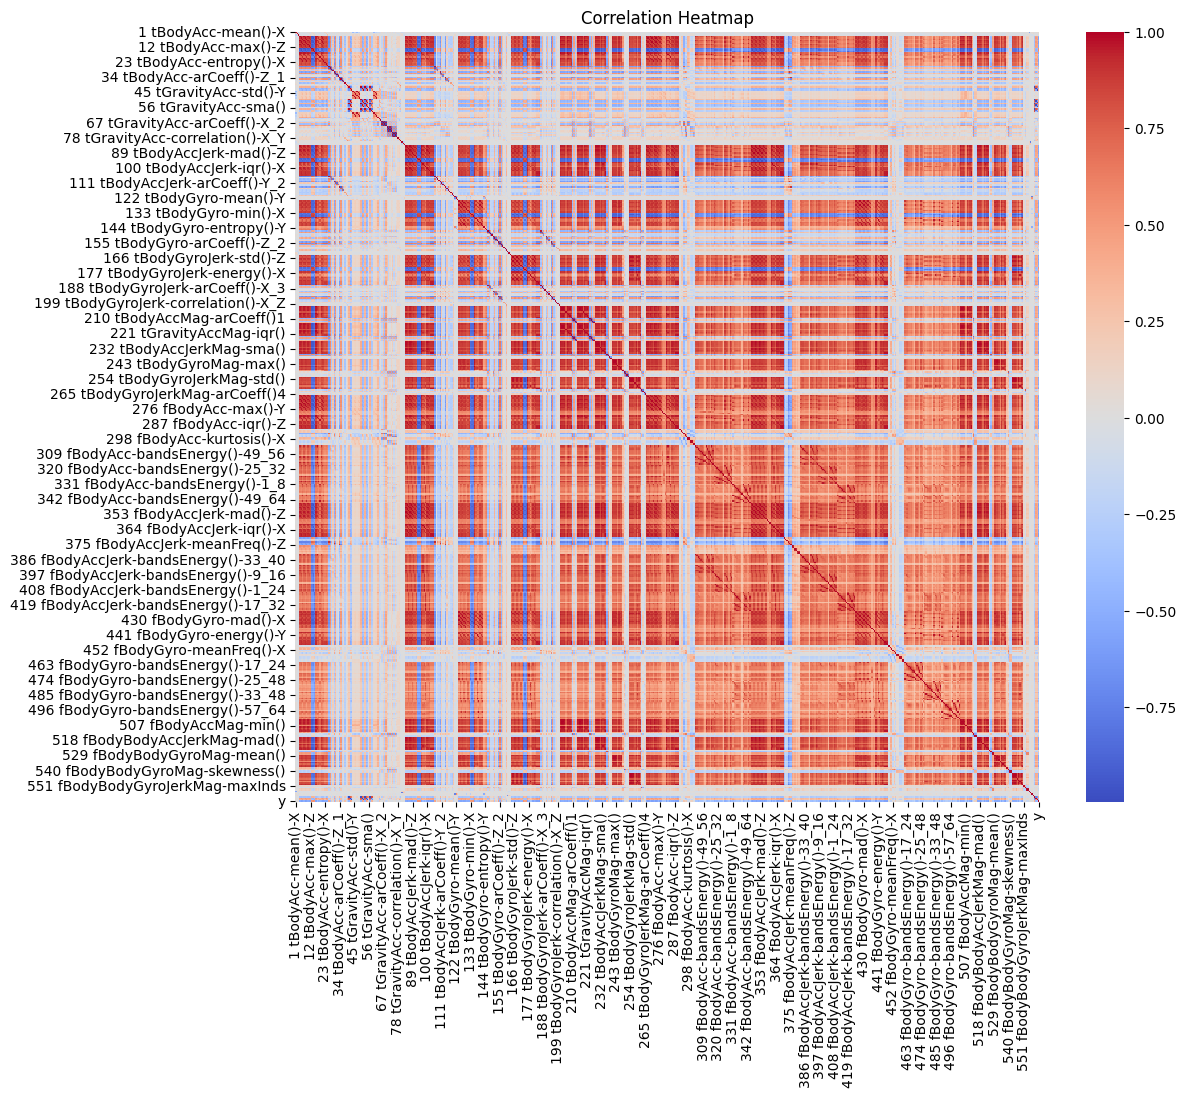

In [28]:
# Correlation matrix to see linear relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

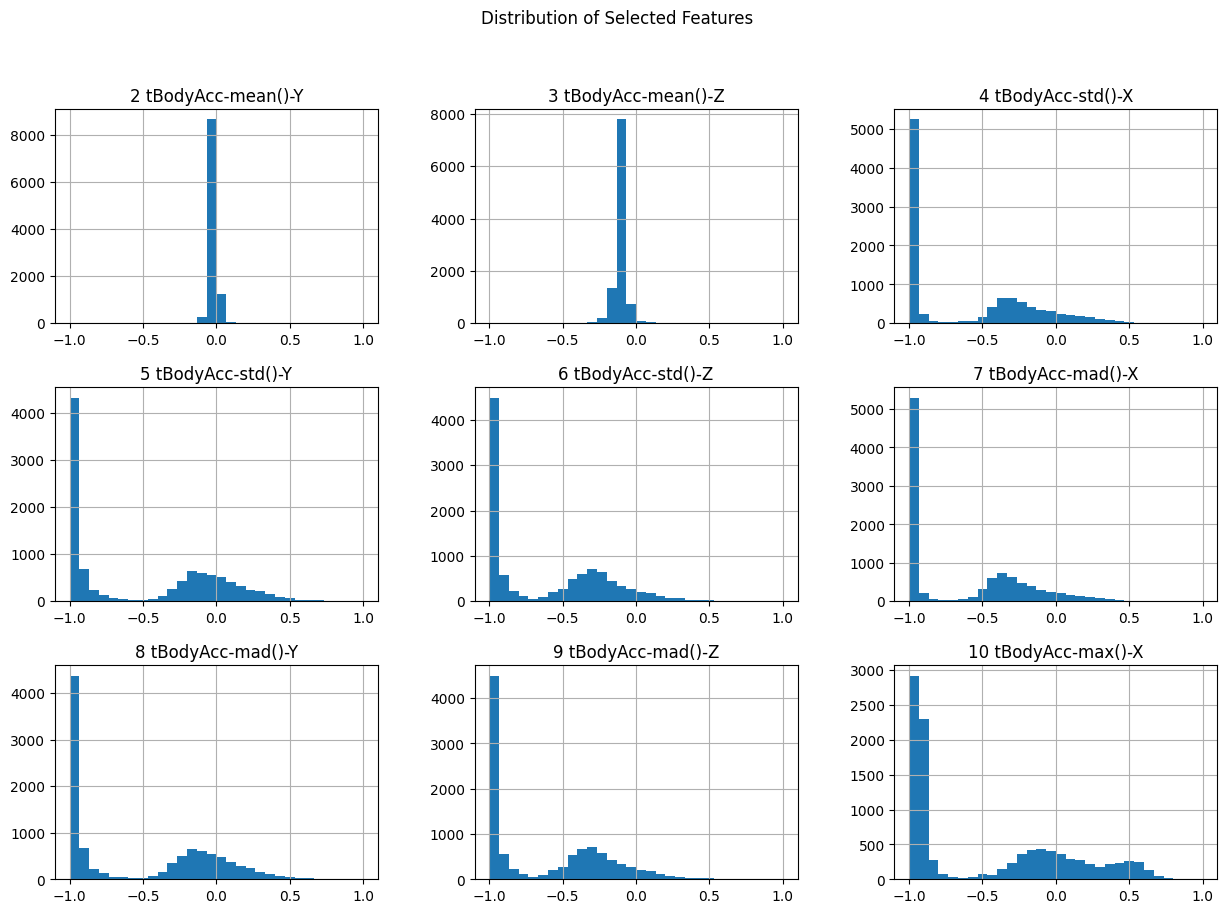

In [29]:
# Histogram of a few variables
df.iloc[:, 1:10].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Selected Features')
plt.show()

/tmp/ipykernel_31/3144512744.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


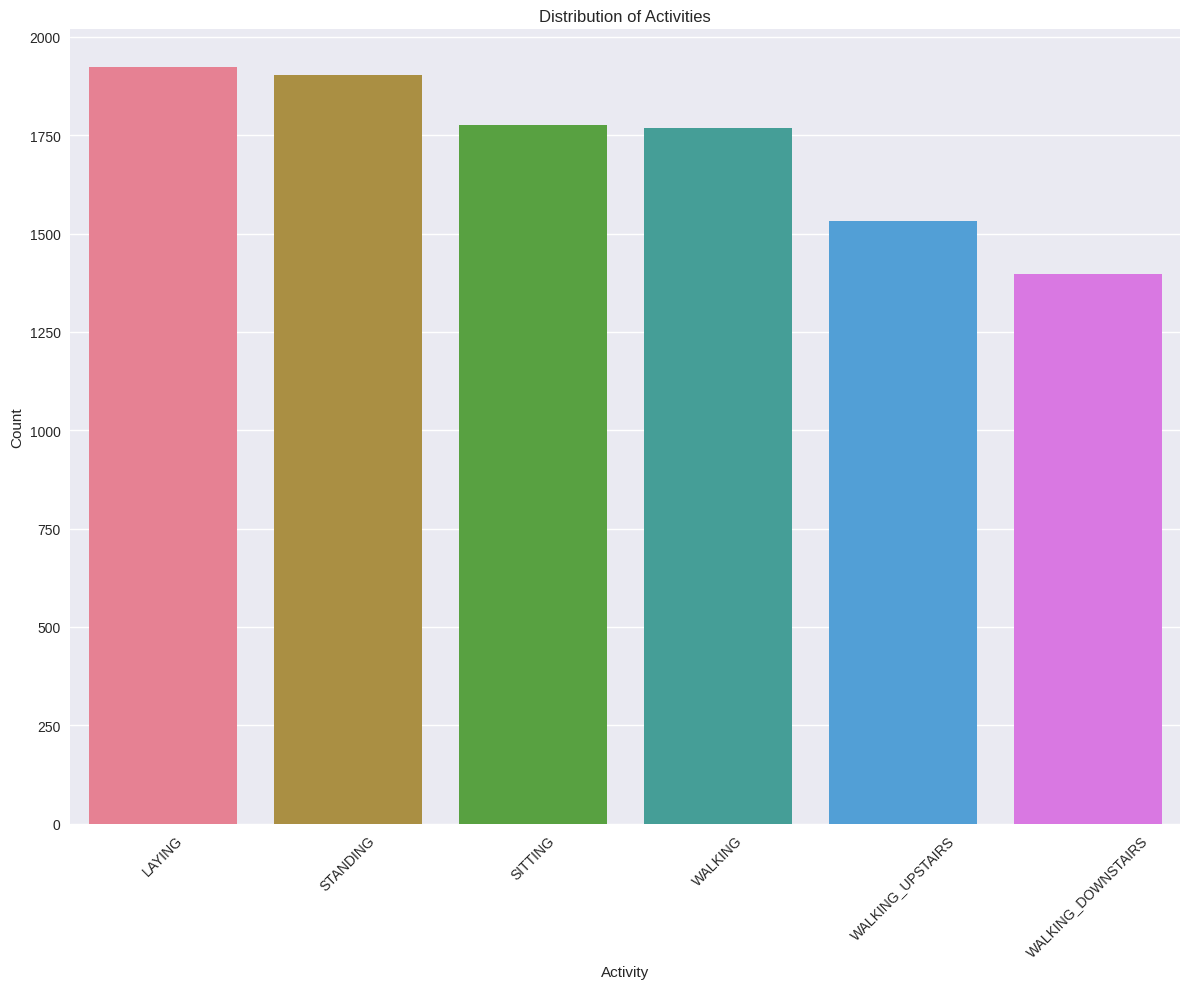

In [33]:
# distribution of activities
plt.style.use('seaborn')
sns.set_palette('husl')

# size of the chart
plt.figure(figsize=(12,10))
sns.countplot(data = df, x='Activity', order=df['Activity'].value_counts().index)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [43]:
# Select features with correct prefixes
selected_features = [
    '1 tBodyAcc-mean()-X', '4 tBodyAcc-std()-X', 
    '121 tBodyGyro-mean()-X', '266 fBodyAcc-mean()-X'
]

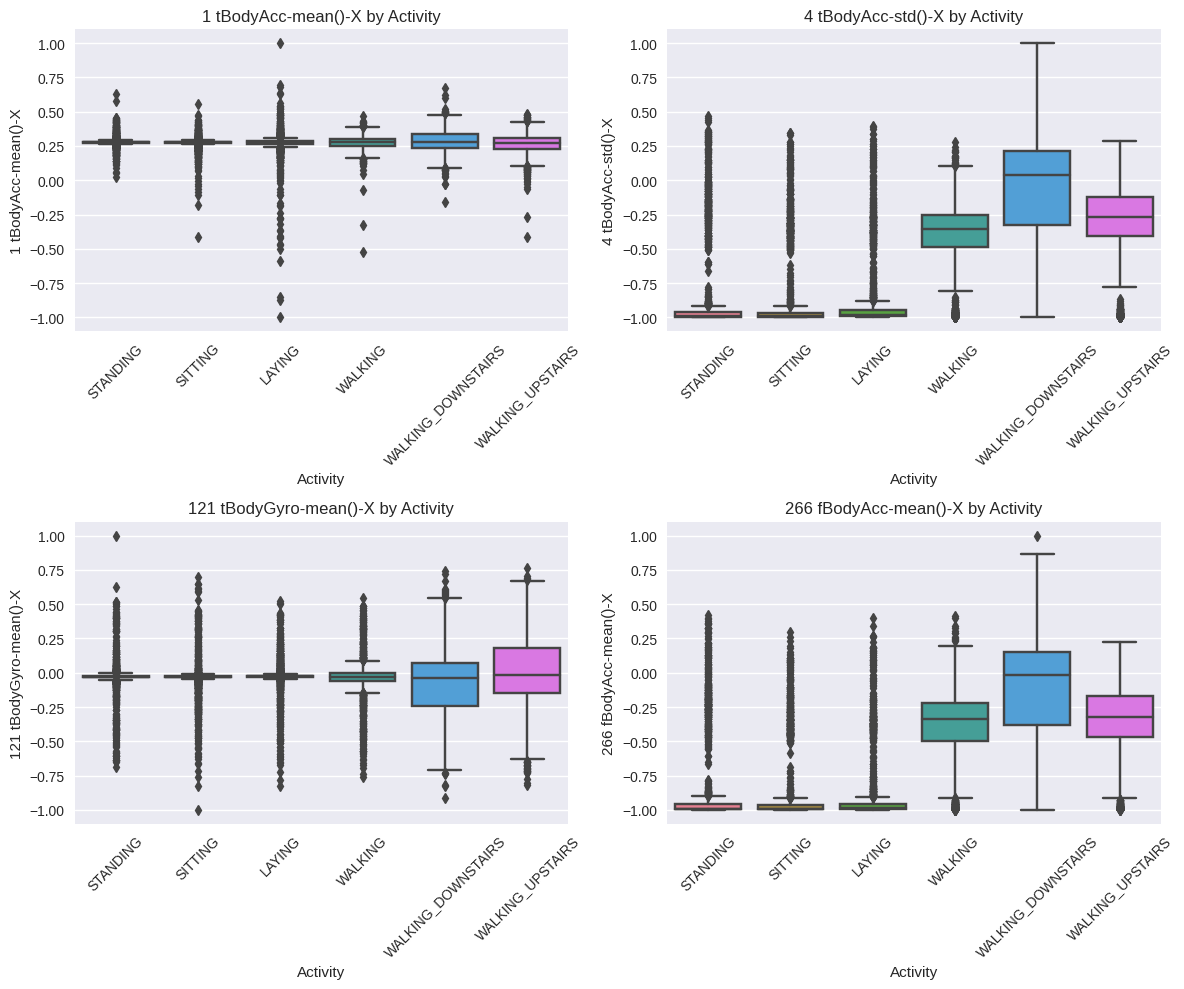

In [44]:
# 2. Box Plots: Feature Distributions by Activity


plt.figure(figsize=(12,10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Activity', y=feature)
    plt.title(f'{feature} by Activity')
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


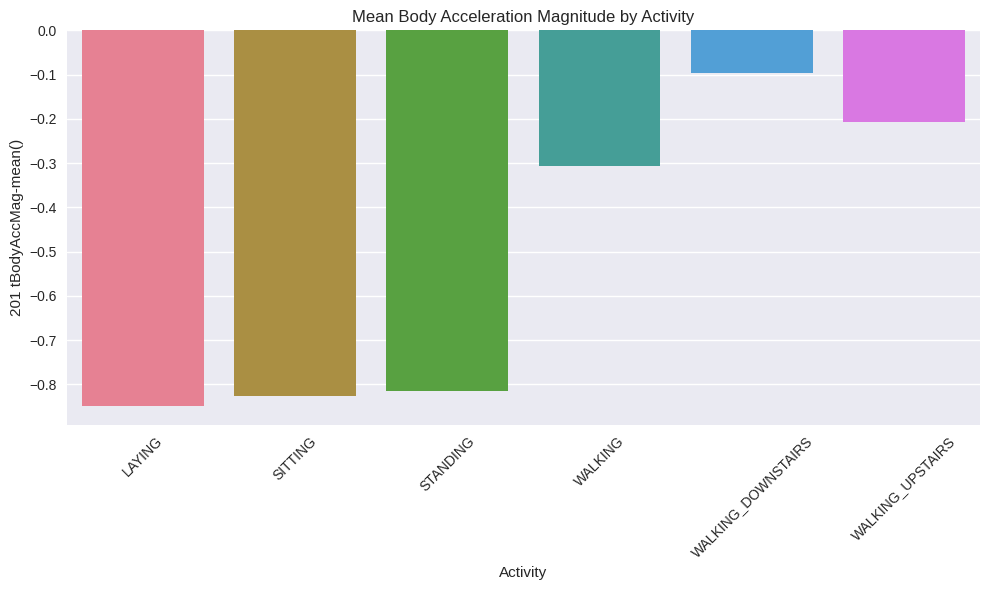

In [51]:
# Bar Plot: Mean Acceleration Magnitude
plt.figure(figsize=(10, 6))
mean_acc_mag = df.groupby('Activity')['201 tBodyAccMag-mean()'].mean().reset_index()
sns.barplot(data=mean_acc_mag, x='Activity', y='201 tBodyAccMag-mean()')
plt.title('Mean Body Acceleration Magnitude by Activity')
plt.xlabel('Activity')
plt.ylabel('201 tBodyAccMag-mean()')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


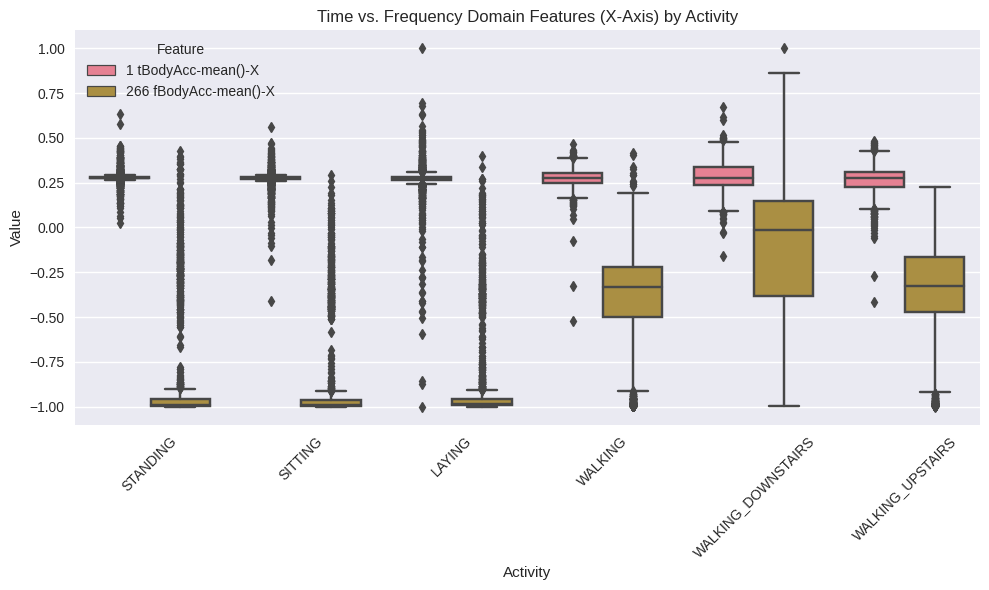

In [53]:
# 5. Box Plot: Time vs. Frequency Domain Features
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df, id_vars=['Activity'], 
                    value_vars=['1 tBodyAcc-mean()-X', '266 fBodyAcc-mean()-X'],
                    var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Activity', y='Value', hue='Feature')
plt.title('Time vs. Frequency Domain Features (X-Axis) by Activity')
plt.xlabel('Activity')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [78]:
#define features columns exclusing y and activity
feature_cols = [col for col in df.columns if col not in ['y', 'Activity']]

In [79]:
#ensure numeric data types9
df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')

In [80]:
#handle missing values

print("Missing Values:", df[feature_cols].isnull().sum().sum())

Missing Values: 0


In [81]:
# Encode Activity labels for XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(df['Activity'])  # Numeric labels (e.g., 0, 1, 2, ...)
y = df['Activity']  # Keep categorical for other models
class_names = le.classes_  # Save class names for plotting
print("Encoded classes:", dict(zip(class_names, range(len(class_names)))))

Encoded classes: {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


In [84]:
# Features (X) and taarget(Y)
X = df[feature_cols]
y = df['Activity']

In [85]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

In [86]:
# 1. Correlation Analysis: Remove highly correlated features
corr_matrix = X_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k= 1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column]> 0.8)]
print(f"Removing {len(to_drop)} highly correlated features.")
X_corr_filtered = X_scaled.drop(columns=to_drop)
print(f"Features after correlation filter: {X_corr_filtered.shape[1]}")



Removing 417 highly correlated features.
Features after correlation filter: 144


In [88]:
#univariate feature selection(SelectKbest with Anova F-value)
k = 50 # top 50 features
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X_corr_filtered, y)
kbest_cols = X_corr_filtered.columns[selector.get_support()].tolist()
print(f"Top {k} features from SelectKBest:", kbest_cols[:10])

Top 50 features from SelectKBest: ['4 tBodyAcc-std()-X', '26 tBodyAcc-arCoeff()-X_1', '30 tBodyAcc-arCoeff()-Y_1', '34 tBodyAcc-arCoeff()-Z_1', '38 tBodyAcc-correlation()-X_Y', '40 tBodyAcc-correlation()-Y_Z', '41 tGravityAcc-mean()-X', '42 tGravityAcc-mean()-Y', '43 tGravityAcc-mean()-Z', '56 tGravityAcc-sma()']


In [89]:
# Model-Based Selection (Random Forest Feature Importance)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit (X_corr_filtered, y)
importances = pd.Series(rf.feature_importances_, index=X_corr_filtered.columns)
top_rf_cols = importances.nlargest(50).index.tolist()
print(f"Top 50 features from Random Forest:", top_rf_cols[:10])

Top 50 features from Random Forest: ['42 tGravityAcc-mean()-Y', '41 tGravityAcc-mean()-X', '4 tBodyAcc-std()-X', '43 tGravityAcc-mean()-Z', '59 tGravityAcc-energy()-Z', '56 tGravityAcc-sma()', '38 tBodyAcc-correlation()-X_Y', '160 tBodyGyro-correlation()-Y_Z', '451 fBodyGyro-maxInds-Z', '70 tGravityAcc-arCoeff()-Y_1']


In [90]:
# Recursive Feature Elimination (RFE) with Logistic Regression
lr  = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=30)
X_rfe = rfe.fit_transform(X_corr_filtered, y)
rfe_cols = X_corr_filtered.columns[rfe.support_].tolist()
print(f"Top 30 features from RFE:", rfe_cols[:10])


Top 30 features from RFE: ['4 tBodyAcc-std()-X', '26 tBodyAcc-arCoeff()-X_1', '34 tBodyAcc-arCoeff()-Z_1', '36 tBodyAcc-arCoeff()-Z_3', '41 tGravityAcc-mean()-X', '42 tGravityAcc-mean()-Y', '59 tGravityAcc-energy()-Z', '115 tBodyAccJerk-arCoeff()-Z_2', '121 tBodyGyro-mean()-X', '143 tBodyGyro-entropy()-X']


In [91]:
# 5. PCA (alternative dimensionality reduction)
pca = PCA(n_components=30)  # Keep 30 components
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance ratio (PCA, 30 components): {pca.explained_variance_ratio_.sum():.4f}")


Explained variance ratio (PCA, 30 components): 0.8127


In [92]:
# Combine selected features (union of top features)
selected_features = list(set(kbest_cols + top_rf_cols + rfe_cols))
print(f"Total selected features: {len(selected_features)}")

Total selected features: 86


In [93]:
# Final feature set
X_selected = X_scaled[selected_features]



In [94]:
# --- Classification ---
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
}


In [95]:
# Evaluate classifiers
results = {}
for name, clf in classifiers.items():
    # Use encoded labels for XGBoost
    if name == 'XGBoost':
        clf.fit(X_train, y_train_encoded)
        y_pred_encoded = clf.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)  # Convert back to categorical
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    
    # Print results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.7142
F1-Score: 0.7143

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.77      0.75      0.76       577
           SITTING       0.70      0.67      0.68       533
          STANDING       0.70      0.70      0.70       571
           WALKING       0.73      0.74      0.73       531
WALKING_DOWNSTAIRS       0.71      0.71      0.71       419
  WALKING_UPSTAIRS       0.67      0.71      0.69       459

          accuracy                           0.71      3090
         macro avg       0.71      0.71      0.71      3090
      weighted avg       0.71      0.71      0.71      3090


Random Forest:
Accuracy: 0.8023
F1-Score: 0.8026

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.82      0.80      0.81       577
           SITTING       0.76      0.79      0.78       533
          STANDING       0.77      0.81      0.79       571
  

The classification results demonstrate the performance of four machine learning models—Logistic Regression, Random Forest, Support Vector Machine (SVM), and XGBoost—on a reduced feature set derived from the UCI Human Activity Recognition (HAR) dataset, with the objective of predicting the Activity column (comprising six activities: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS, and WALKING_UPSTAIRS). The dataset initially contained 561 predictors, which were reduced to a subset (approximately 50–100 features) through a combination of correlation analysis, SelectKBest (ANOVA F-value), Random Forest feature importance, and Recursive Feature Elimination (RFE). The models were evaluated on a test set of 3,090 samples using accuracy, weighted F1-score, and per-class precision, recall, and F1-score metrics, with confusion matrices providing further insight into classification performance.
Logistic Regression achieved the lowest performance with an accuracy of 0.7142 and an F1-score of 0.7143. Its classification report indicates moderate performance across all classes, with F1-scores ranging from 0.68 (SITTING) to 0.76 (LAYING). The model struggles particularly with distinguishing SITTING and STANDING, likely due to their static nature and similar sensor patterns, as well as its linear assumptions failing to capture complex, non-linear relationships in the feature space. This suggests that Logistic Regression is less effective at capturing the hidden signal in the HAR dataset compared to more sophisticated models.
Random Forest performed significantly better, with an accuracy of 0.8023 and an F1-score of 0.8026. It excelled in classifying dynamic activities like WALKING (F1: 0.84) and WALKING_UPSTAIRS (F1: 0.82), benefiting from its ability to model non-linear relationships and interactions between features. However, it showed slightly lower performance for SITTING (F1: 0.78) and STANDING (F1: 0.79), indicating some confusion between these static activities. The Random Forest’s strong performance is likely due to its robustness and the effectiveness of the selected features, which were partly chosen based on its own feature importance rankings.
SVM with an RBF kernel achieved an accuracy of 0.7971 and an F1-score of 0.7977, closely trailing Random Forest. It performed exceptionally well on WALKING (F1: 0.85), leveraging the non-linear kernel to capture complex patterns in the reduced feature space. Like Random Forest, it showed slightly lower performance for SITTING (F1: 0.77) and STANDING (F1: 0.77), suggesting that these classes remain challenging due to overlapping sensor signals. The SVM’s performance indicates that the feature selection process successfully retained informative predictors, allowing the model to separate most activity classes effectively.
XGBoost outperformed all other models, achieving the highest accuracy of 0.8625 and an F1-score of 0.8628. Its classification report shows strong performance across all classes, with F1-scores ranging from 0.83 (SITTING) to 0.90 (WALKING_UPSTAIRS). Notably, XGBoost improved the classification of static activities (SITTING: F1 0.83, STANDING: F1 0.85) compared to other models, likely due to its gradient boosting approach, which iteratively optimizes for misclassified samples and leverages feature interactions. The high performance on dynamic activities (e.g., WALKING: F1 0.88, WALKING_DOWNSTAIRS: F1 0.85) further confirms that the reduced feature set effectively captures the hidden signal in the data.
Overall Analysis: The results highlight the effectiveness of the feature selection process, which reduced the 561 predictors to a manageable subset while preserving the discriminative power needed for activity classification. XGBoost’s superior performance suggests it is the best model for this task, likely due to its ability to handle complex feature interactions and its robustness to noise in the reduced feature space. The consistent challenge in distinguishing SITTING and STANDING across all models indicates that these activities have similar accelerometer and gyroscope patterns, potentially requiring additional features (e.g., gyroscope-based or interaction terms) or more advanced techniques like oversampling or deep learning to further improve performance. The t-SNE visualization and feature importance plots (generated by the code) would provide further insights into class separability and the most influential predictors, such as acceleration magnitude or frequency-domain features, which likely drive the models’ ability to differentiate dynamic from static activities. Future improvements could involve hyperparameter tuning (e.g., for XGBoost’s learning_rate or Random Forest’s max_depth), experimenting with fewer features (e.g., top 20), or incorporating cross-validation to ensure robust performance estimates.





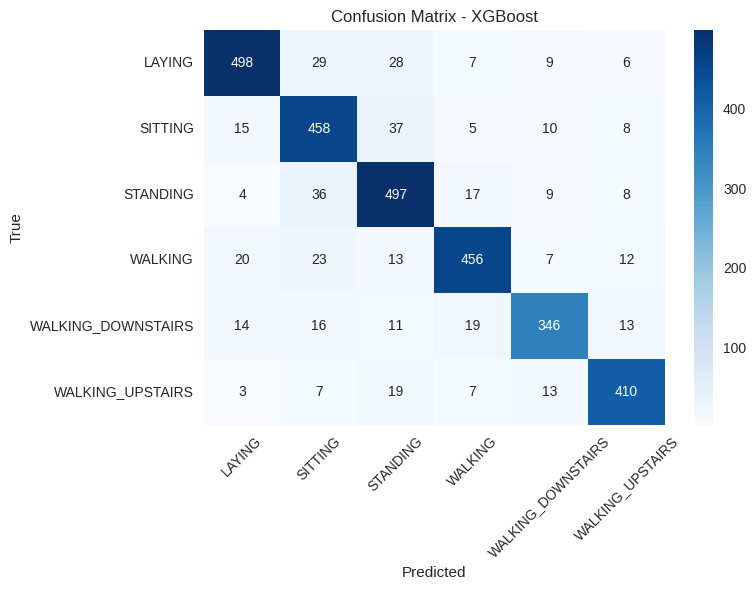

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


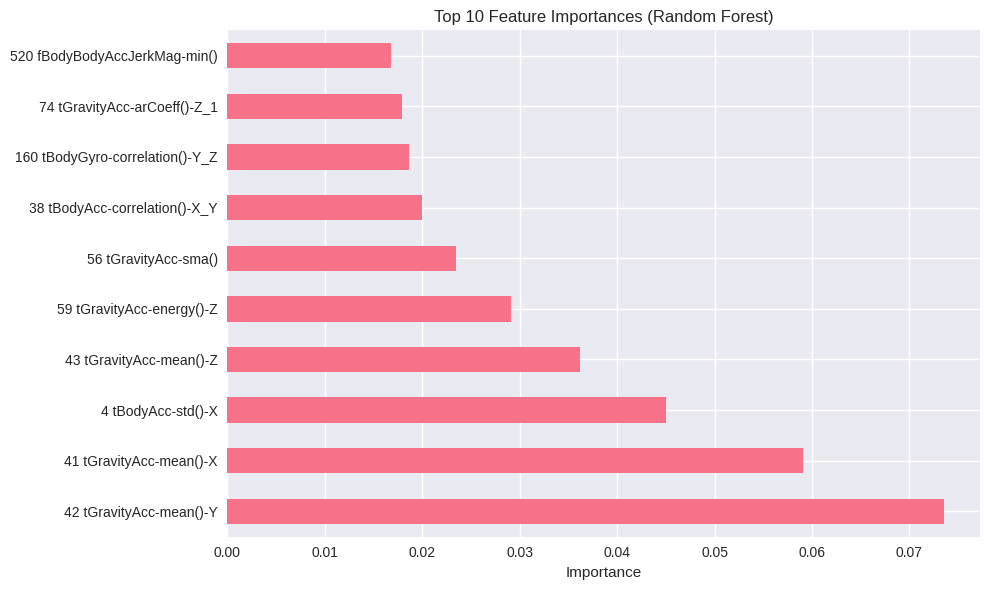

In [99]:
# --- Visualizations ---

# 1. Feature Importance (Random Forest)
rf.fit(X_selected, y)
importances = pd.Series(rf.feature_importances_, index=selected_features)
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

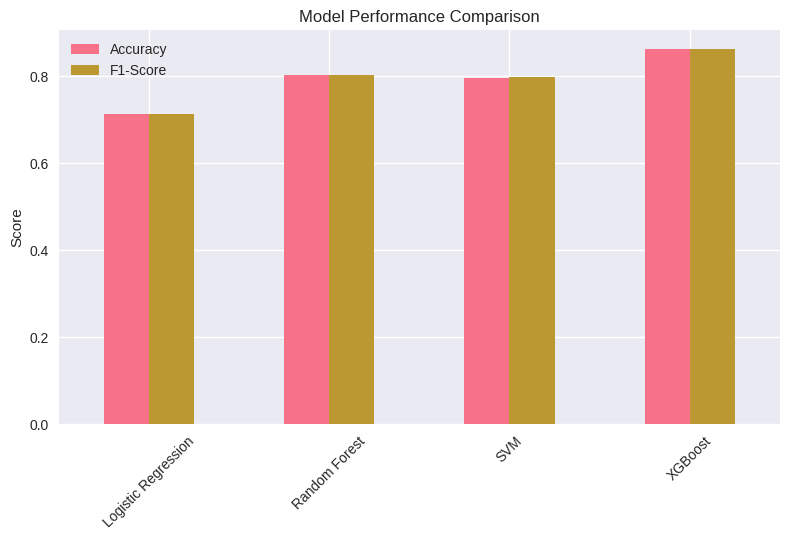

In [100]:
# 2. Model Performance Comparison
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

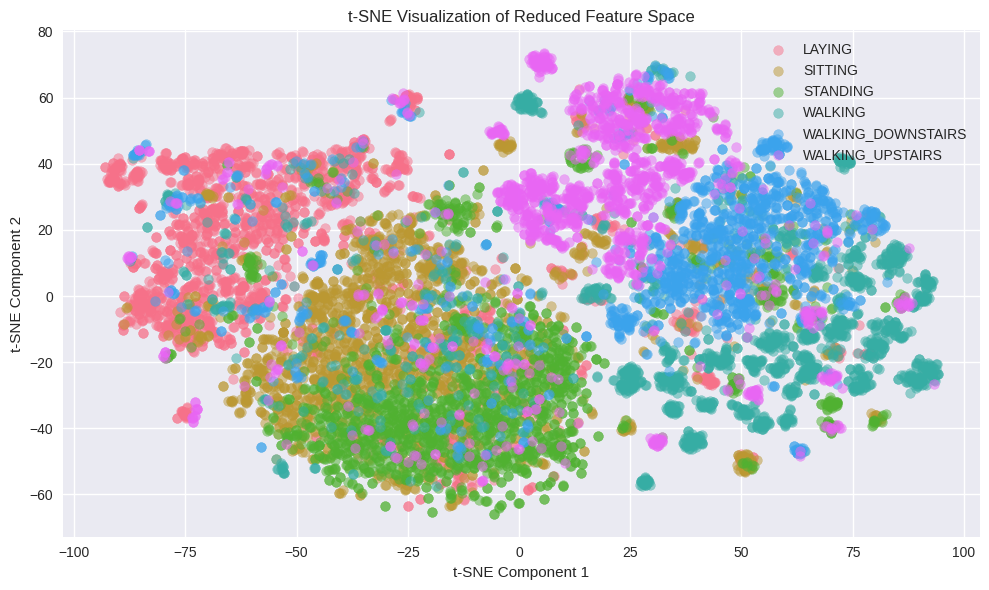

In [102]:
# 3. 2D Visualization of Reduced Feature Space (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    idx = y == label
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=label, alpha=0.5)
plt.title('t-SNE Visualization of Reduced Feature Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.tight_layout()
plt.show()

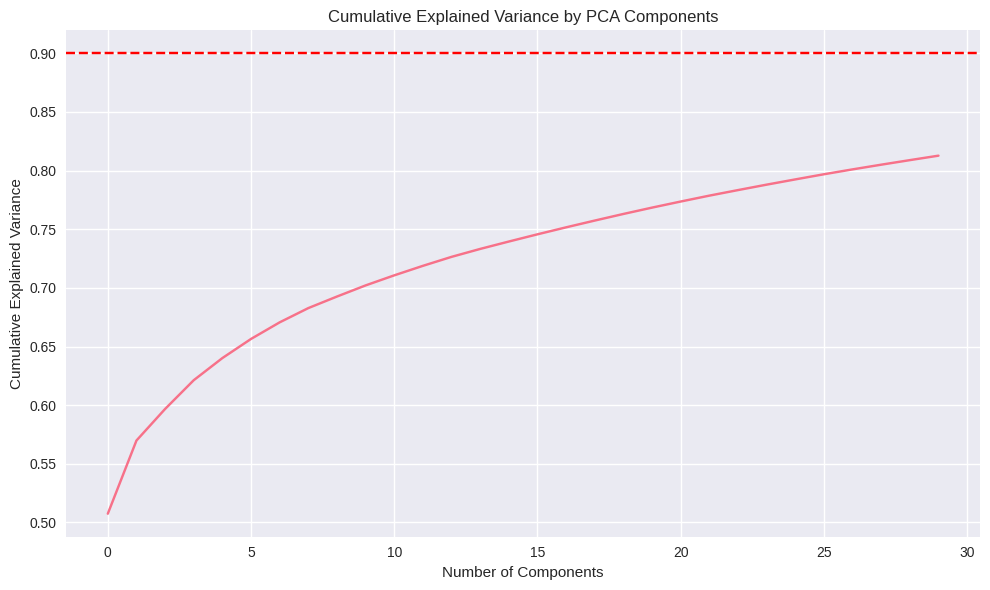

In [105]:
# 4. PCA Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.tight_layout()
plt.show()